# Лабораторна робота №7
**Тема:** Дослідження та візуалізація даних за допомогою Pandas <br>
**Мета:** отримати базові навики використання Pandas для дослідження та візуалізації даних.

In [2]:
print(f"Варіант №{ord("D") % 3 + 1}")

Варіант №3


## Завдання (Варіант 3):
1. Знайдіть добові втрати БТР.
2. Знайдіть 5 найбільших добових втрат БТР і визначте дати.
3. Визначте, скільки БТР було знищено влітку 2024 року.
4. Знайдіть середнє значення знищених БТР за 100-500 днів війни.
5. Створіть графік втрат БТР та особового складу (танків) за останні 200 днів.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("russia_losses_equipment.csv")
df.head()

,date,day,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,fuel tank,drone,naval ship,anti-aircraft warfare,special equipment,mobile SRBM system,greatest losses direction,vehicles and fuel tanks,cruise missiles,submarines
0,2025-11-16,1362,428,347,11353,23591,34469,1543,NaN,NaN,81286,28,1244,4000.0,NaN,NaN,67464.0,3940.0,1.0
1,2025-11-15,1361,428,347,11350,23588,34443,1541,NaN,NaN,80877,28,1244,3998.0,NaN,NaN,67396.0,3940.0,1.0
2,2025-11-14,1360,428,347,11344,23569,34423,1540,NaN,NaN,80387,28,1242,3996.0,NaN,NaN,67306.0,3926.0,1.0
3,2025-11-13,1359,428,347,11344,23567,34388,1540,NaN,NaN,79945,28,1242,3996.0,NaN,NaN,67211.0,3926.0,1.0
4,2025-11-12,1358,428,347,11342,23556,34379,1540,NaN,NaN,79804,28,1240,3994.0,NaN,NaN,67123.0,3926.0,1.0


## Завдання №1: Знайдіть добові втрати БТР.

In [11]:
daily = df[["date", "APC"]].copy()
daily = daily.iloc[::-1]
daily["APC_daily"] = daily["APC"].diff().fillna(daily['APC'])
daily = daily.iloc[::-1]
daily

,date,APC,APC_daily
0,2025-11-16,23591,3.0
1,2025-11-15,23588,19.0
2,2025-11-14,23569,2.0
3,2025-11-13,23567,11.0
4,2025-11-12,23556,3.0
...,...,...,...
1356,2022-03-01,846,30.0
1357,2022-02-28,816,110.0
1358,2022-02-27,706,0.0
1359,2022-02-26,706,190.0


## Завдання №2: Знайдіть 5 найбільших добових втрат БТР і визначте дати.

In [7]:
top5 = daily.sort_values("APC_daily", ascending=False).head(5)
top5

,date,APC,APC_daily
1360,2022-02-25,516,516.0
1359,2022-02-26,706,190.0
758,2023-10-20,9557,120.0
1357,2022-02-28,816,110.0
1341,2022-03-16,1375,96.0


## Завдання №3: Визначте, скільки БТР було знищено влітку 2024 року.

In [8]:
summer_loss = (df[df["date"] == "2024-08-31"]["APC"].values - df[df["date"] == "2024-06-01"]["APC"].values)[0]
print(f"Втрати БТР влітку 2024: {summer_loss}")

Втрати БТР влітку 2024: 1789


## Завдання №4: Знайдіть середнє значення знищених БТР за 100-500 днів війни.

In [9]:

daily_sorted = daily.iloc[::-1] 

avg_val = daily_sorted.iloc[100:500]["APC_daily"].mean()
print(f"Середні добові втрати БТР (100-500 дні): {avg_val}")

Середні добові втрати БТР (100-500 дні): 11.4625


## Завдання №5: Створіть графік втрат БТР та особового складу за останні 200 днів.
Оскільки у файлі відсутні дані про особовий склад, для аналізу використано дані про Танки.

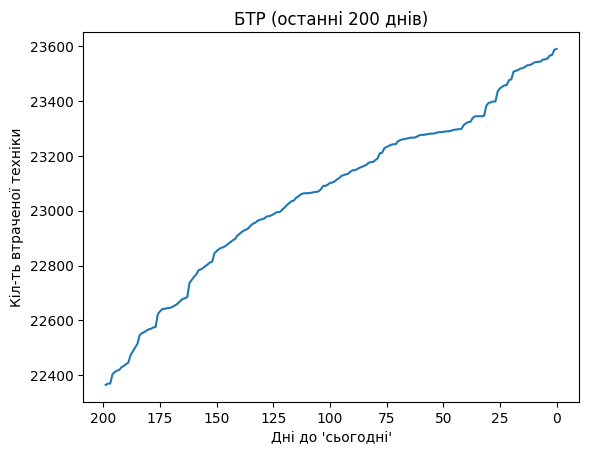

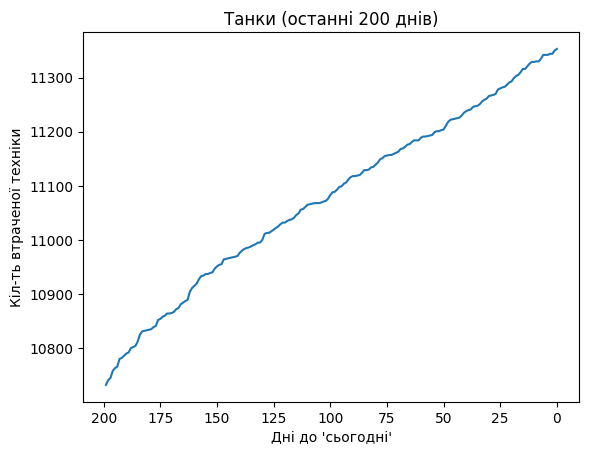

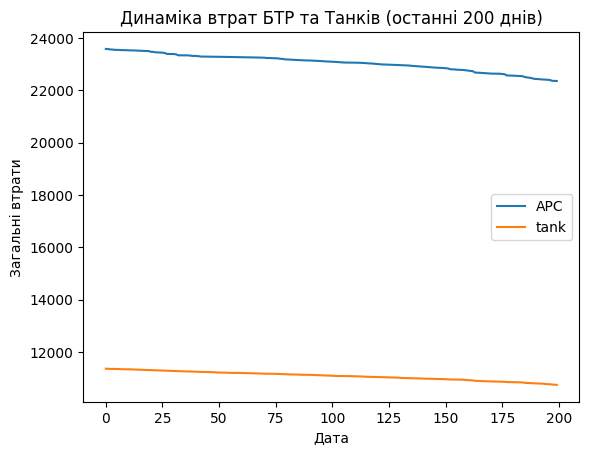

In [10]:

APC_last200 = df.iloc[:200]["APC"]
APC_last200.plot()
plt.xlabel("Дні до 'сьогодні'")
plt.ylabel("Кіл-ть втраченої техніки")
plt.title("БТР (останні 200 днів)")
plt.gca().invert_xaxis()
plt.show()

tank_last200 = df.iloc[:200]["tank"]
tank_last200.plot()
plt.xlabel("Дні до 'сьогодні'")
plt.ylabel("Кіл-ть втраченої техніки")
plt.title("Танки (останні 200 днів)")
plt.gca().invert_xaxis()
plt.show()

combined = df.iloc[:200][["APC", "tank"]].copy()
combined = combined.iloc[::-1]
combined.plot()
plt.xlabel("Дата")
plt.ylabel("Загальні втрати")
plt.title("Динаміка втрат БТР та Танків (останні 200 днів)")
plt.show()